# Decision Trees

## Libraries Import

In [1]:
import random

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from helpers.get_tree_rules import get_tree_rules
from helpers.plot_tree_decision_boundary import plot_tree_decision_boundary

## Configuration

In [2]:
RANDOM_ENTRIES_TO_PRINT = 6
TRAIN_SPLIT_RATIO = 0.8
USED_CRITERION = "gini"
MAX_HEIGHT = 3

## Dataset Loading

In [3]:
iris_data = load_iris()

In [4]:
feature_names = iris_data["feature_names"]
print("The names of the features are:")
for feature in feature_names:
    print("- {}".format(feature))
print()

print("The description of the dataset is:\n\n{}".format(iris_data["DESCR"]))

The names of the features are:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

The description of the dataset is:

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3

In [5]:
data = iris_data["data"]
target = iris_data["target"]
target_names = iris_data["target_names"]

iris_df = pd.DataFrame(data, columns=feature_names)
iris_df["target"] = target

In [6]:
print("Random {} entries are:\n\n{}".format(RANDOM_ENTRIES_TO_PRINT, iris_df.sample(n=RANDOM_ENTRIES_TO_PRINT)))

Random 6 entries are:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
135                7.7               3.0                6.1               2.3   
103                6.3               2.9                5.6               1.8   
35                 5.0               3.2                1.2               0.2   
102                7.1               3.0                5.9               2.1   
104                6.5               3.0                5.8               2.2   
24                 4.8               3.4                1.9               0.2   

     target  
135       2  
103       2  
35        0  
102       2  
104       2  
24        0  


## Dataset Splitting

In [7]:
X = iris_df.loc[:, iris_df.columns != "target"]
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT_RATIO)

## Model Training and Evaluation

In [8]:
model = DecisionTreeClassifier(criterion=USED_CRITERION)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
print("The used criterion is \"{}\".".format(model.criterion))
print("The depth is {}.".format(model.get_depth()))
print("The number of leaves is {}.".format(model.get_n_leaves()))
print("The number of nodes is {}.".format(model.tree_.node_count))
print("The importance of the features are {}.".format(model.feature_importances_))

The used criterion is "gini".
The depth is 4.
The number of leaves is 7.
The number of nodes is 13.
The importance of the features are [0.         0.03882279 0.38786039 0.57331682].


In [10]:
print("The tree has the following structure: \n\n{}".format(export_text(model)))

The tree has the following structure: 

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



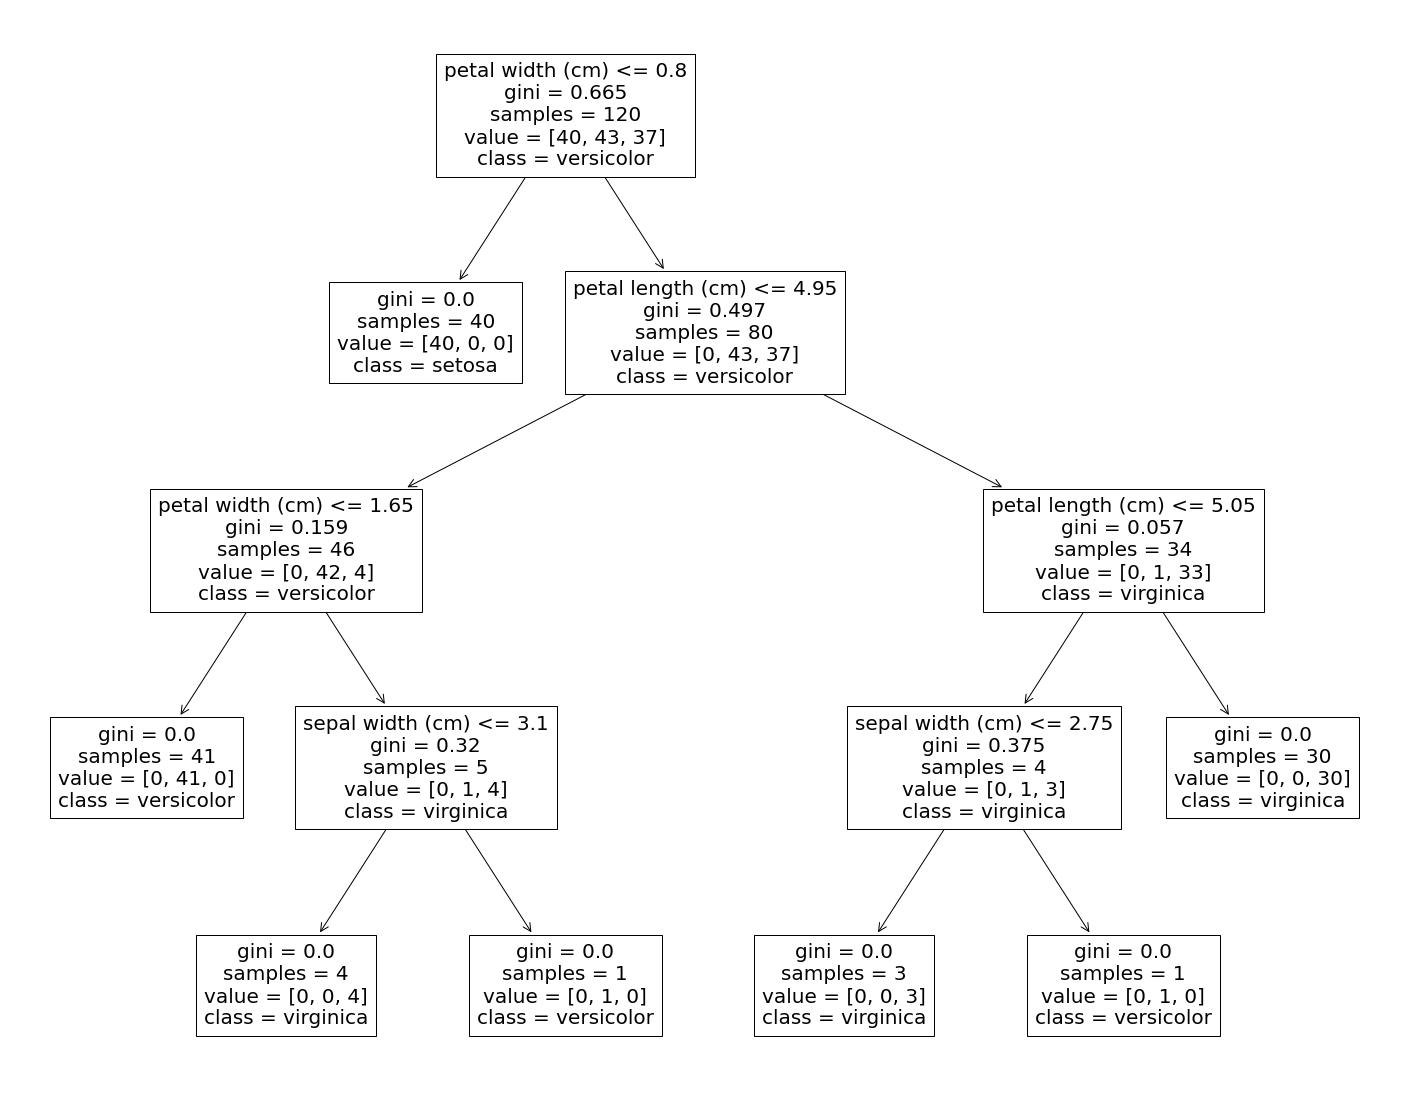

In [11]:
fig = pyplot.figure(figsize=(25,20))
plot_tree(model, feature_names=feature_names, class_names=target_names)
fig.show()

In [12]:
score = model.score(X_train, y_train)
print("The model accuracy is {}.".format(score))

The model accuracy is 1.0.


## Training and Evaluation of a Restricted Model

In [13]:
sorted_indexes = np.argsort(model.feature_importances_)

print("The importances of the features are:")
for index in zip(sorted_indexes):
    print("- feature '{}', with an importance of {:.2f}".format(iris_df.columns[index], model.feature_importances_[index]))

The importances of the features are:
- feature 'sepal length (cm)', with an importance of 0.00
- feature 'sepal width (cm)', with an importance of 0.04
- feature 'petal length (cm)', with an importance of 0.39
- feature 'petal width (cm)', with an importance of 0.57


In [14]:
relevant_columns = list(iris_df.columns[sorted_indexes[::-1][:2]])

In [15]:
X = iris_df.loc[:, relevant_columns]
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT_RATIO)

In [16]:
restricted_model = DecisionTreeClassifier(criterion=USED_CRITERION, max_depth=MAX_HEIGHT)
restricted_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

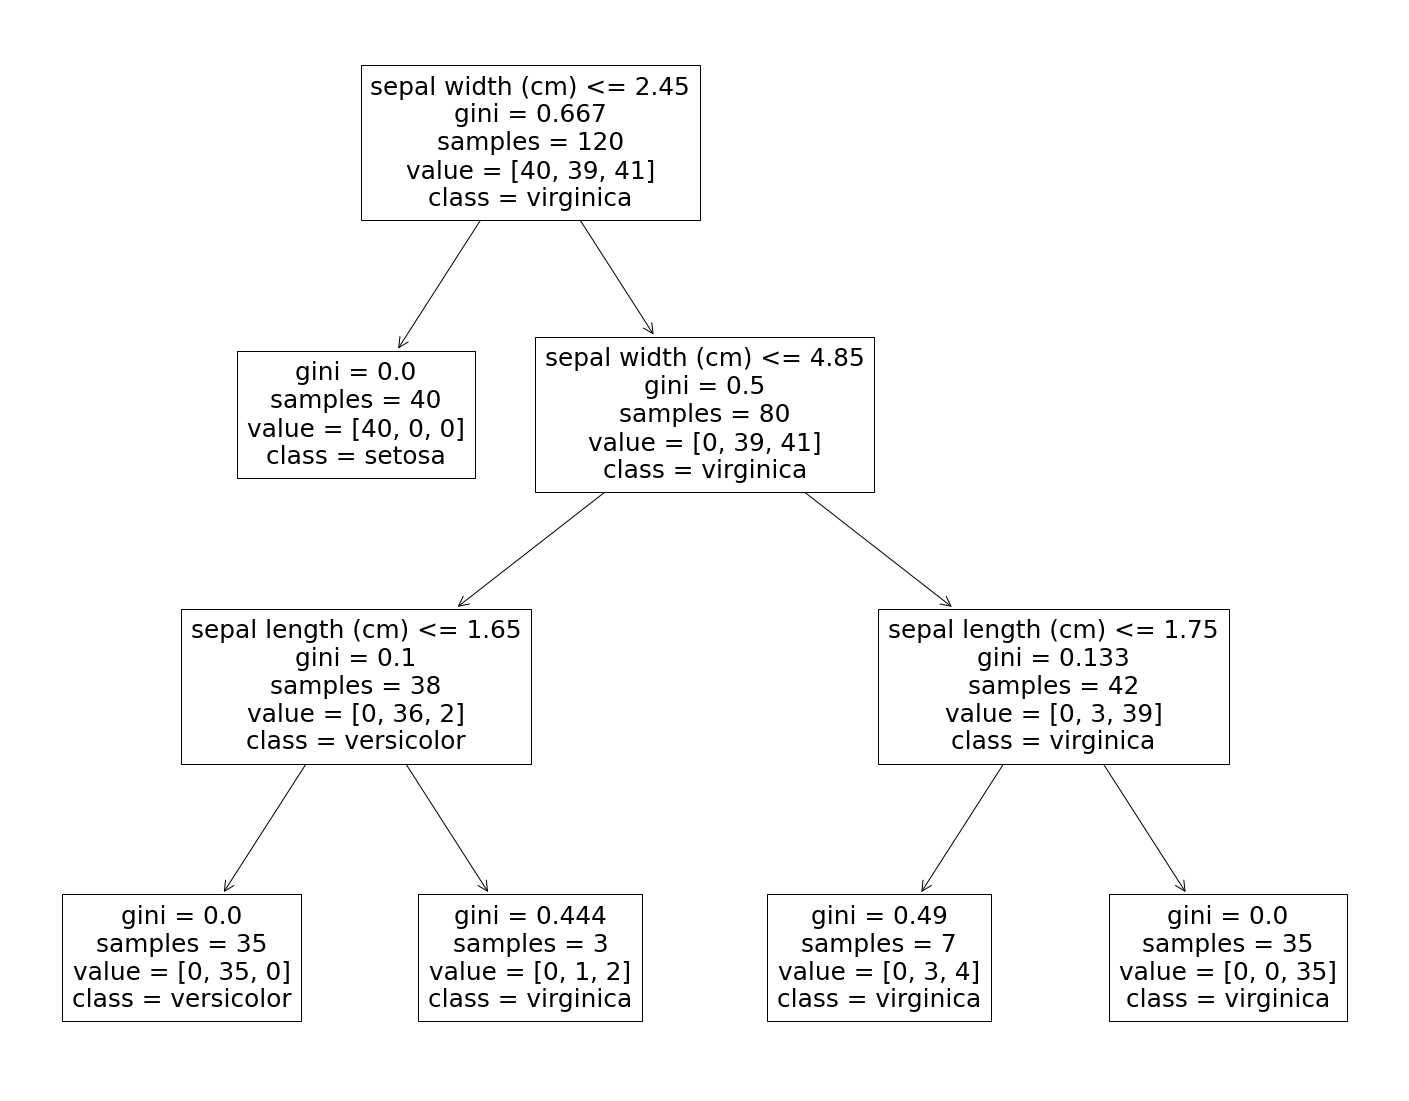

In [17]:
fig = pyplot.figure(figsize=(25,20))
plot_tree(restricted_model, feature_names=feature_names, class_names=target_names)
fig.show()

In [18]:
restricted_score = restricted_model.score(X_train, y_train)
print("The accuracy of the restricted model is {:.2f}.".format(restricted_score))

The accuracy of the restricted model is 0.97.


In [19]:
random_sample = X_test.sample(1)
probabilities = restricted_model.predict_proba(random_sample)[0]
print("The predicted probabilities for the random samples are {}.".format(probabilities))

The predicted probabilities for the random samples are [0. 1. 0.].


In [20]:
y_pred = restricted_model.predict(X_train)

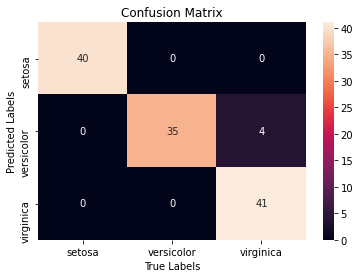

In [21]:
matrix = confusion_matrix(y_train, y_pred)

plot = sns.heatmap(matrix, xticklabels=target_names, yticklabels=target_names, annot=True, fmt="d")
plot.set_xlabel("True Labels")
plot.set_ylabel("Predicted Labels")
plot.set_title("Confusion Matrix")
plot.legend([],[], frameon=False)
pyplot.show()

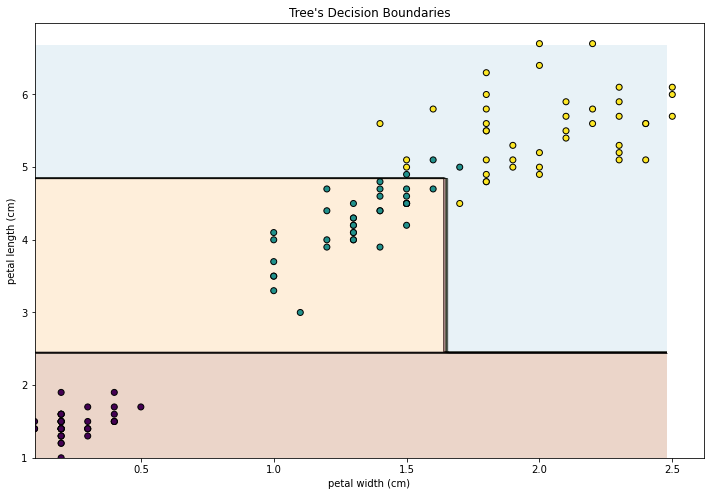

In [22]:
plot_tree_decision_boundary(restricted_model, X_train, y_train)